In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

% matplotlib inline

# Quadraturas

Quadratura são métodos para aproximar integrais por somas. Em várias situações, podemos definir quadraturas simples através de fórmulas intuitivas. No entanto, as quadraturas mais eficazes exigem um pouco mais de aprofundamento.

Começamos com o caso mais simples, a regra do ponto do meio. Lembramos que a integral é a área abaixo de uma curva. A figura abaixo ilustra uma aproximação simples para esta integral.

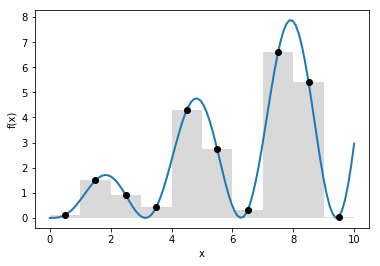

In [2]:
def f(x):
    return x * np.sin(x)**2

# Fazemos o gráfico da linha principal
X = np.linspace(0, 10, 100)
Y = f(X)
plt.plot(X, Y, lw=2)
plt.xlabel('x')
plt.ylabel('f(x)')

# Aqui marcamos o ponto do meio de cada partição e desenhamos cada 
# retângulo usando a função plt.fill()
for i in range(10):
    X = [i, i + 1, i + 1, i, i]
    Y = [0, 0, f(i + 0.5), f(i + 0.5), 0]
    plt.fill(X, Y, '0.85')                    # desenha o retângulo correspondente à partição
    plt.plot([i + 0.5], [f(i + 0.5)], 'ko')   # pinta um único ponto no centro da partição

Aqui aproximamos a integral pela soma da área dos retângulos, utilizando o centro de cada intervalo como a referência para a altura do retângulo. Podemos avaliar facilmente a área destes retângulos utilizando a fórmula

$$S_i = h\ f\left(x_i + \frac{h}{2}\right)$$

onde $h$ é definido com o tamanho de cada divisão no domínio de integração. Neste caso, $h=1$ e $x_i = i$.

In [3]:
h = 1

# np.arange(0, 10, h) produz um range de valores de 0 a 10, pulando
# de h em h. Neste caso, X[i] corresponde ao ponto inicial de 
# cada intervalo    
X = np.arange(0, 10, h)

# Aplicamos a função em cada x e geramos uma lista de 
# quadraturas pelo método do ponto do meio
S = h * f(X + h / 2)

# Imprimimos o resultado
print('integral: %.4f' % S.sum())

integral: 22.3441


É óbvio que podemos melhorar o resultado realizando divisões menores do domínio de integração.

In [4]:
# Agora avançamos de 1e-6 em 1e-6
h = 1e-6
X = np.arange(0, 10, h)

# Geramos as quadraturas
S = h * f(X + h / 2)

# Comparamos o resultado analítico
# (se não entendeu o que este resultado significa, resolva a integral!)
S_real = 25 + np.sin(10)**2/4 - 5/2 * np.sin(20)

# Imprimimos os dois resultados e a diferença
print('integral:  %.6f' % S.sum())
print('analítico: %.6f' % S_real)
print('diferença: %.3e' % (S.sum() - S_real))

integral:  22.791627
analítico: 22.791627
diferença: -3.588e-13


Outra estratégia é tentar utilizar aproximações melhores para a função dentro de cada sub-divisão. Uma forma de melhorar a regra do ponto do meio é aproximar cada sub-área por um pequeno trapézio, como mostra a figura. 

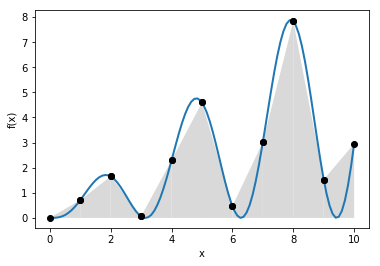

In [5]:
# Gráfico da função
X = np.linspace(0, 10, 100)
Y = f(X)
plt.plot(X, Y, lw=2)
plt.xlabel('x')
plt.ylabel('f(x)')

# Gráfico de cada trapézio na divisão do domínio
for i in range(10):
    X = [i, i + 1, i + 1, i, i]
    Y = [0, 0, f(i + 1), f(i), 0]
    plt.fill(X, Y, '0.85')
    plt.plot([i, i + 1], [f(i), f(i + 1)], 'ko')

In [6]:
# Calculamos o resultado para os 10 trapézios de tamanho 1
h = 1
X = np.arange(0, 10, h)

# Quadratura em cada partição
S = h * (f(X) + f(X + h)) / 2

# Resultado global
print('integral: %.4f' % S.sum())
print('erro: %.3e' % (S.sum() - S_real))

integral: 23.6390
erro: 8.474e-01


A regra do trapézio normalmente não produz resultados melhores que a regra do ponto do meio. Apesar do trapézio fornecer um ajuste visual um pouco mais preciso ao integrando, a regra do ponto do meio gera uma certa compensação natural: o excesso de área em um dos lados do ponto central é frequentemente compensado pela área que falta do outro lado. 

Comparamos o resultado das duas regras para diferentes h's para ver qual das duas regras produz os melhores resultados.

In [7]:
# Variamos o h para vários valores diferentes
for h in [0.01, 0.05, 0.1, 0.5, 1.0, 2.0]:
    
    # Montamos as divisões do integrando
    X = np.arange(0, 10, h)
    
    # Quadraturas do ponto do meio e do trapézio
    S_meio = np.sum(h * f(X + h / 2))
    S_trap = np.sum(h * (f(X) + f(X + h))/2)
    
    # Erro de cada regra de quadratura
    e_meio = abs(S_meio - S_real)
    e_trap = abs(S_trap - S_real)
    
    # Imprimimos os resultados
    print('h: %.2f' % h)
    print('    erro midpoint: %.2e' % e_meio)
    print('    erro trapézio: %.2e' % e_trap)
    print()
    
    # "Dormimos" um pouco para os resultados não aparecerem todos
    # de uma vez
    sleep(0.5)

h: 0.01
    erro midpoint: 3.93e-05
    erro trapézio: 7.85e-05

h: 0.05
    erro midpoint: 9.82e-04
    erro trapézio: 1.96e-03

h: 0.10
    erro midpoint: 3.93e-03
    erro trapézio: 7.86e-03

h: 0.50
    erro midpoint: 1.01e-01
    erro trapézio: 2.00e-01

h: 1.00
    erro midpoint: 4.48e-01
    erro trapézio: 8.47e-01

h: 2.00
    erro midpoint: 2.96e+00
    erro trapézio: 4.66e+00



Vemos que a regra do trapézio em quase todos os casos, gera um erro aproximadamente 2 vezes maior que a regra do ponto do meio. Investigaremos este resultado de maneira mais formal e veremos que a teoria confirma exatamente esta previsão.

## Regra de Simpson

Uma forma de melhorar estes resultados sem precisar diminuir excessivamente o valor de h é utilizar pontos adicionais dentro do intervalo. Fazendo uma escolha adequada, conseguimos ganhos enormes de precisão. Considere a regra de Simpson, que aproxima a função no intervalo por uma parábola escolhendo 3 pontos de referência no início, meio e fim do intervalo.

Na regra de Simpson, a integral sobre cada segmento é aproximada pela seguinte fórmula

$$S_i = \frac{h}{6} \left[f(x_i) + 4 f(x_i + h/2) + f(x_i + h)\right]$$

Consideramos a regra de Simpson na comparação anterior.

In [8]:
for h in [0.01, 0.05, 0.1, 0.5, 1.0, 2.0]:
    # Pontos od integrando
    X = np.arange(0, 10, h)
    
    # Diferentes regras de quadratura
    S_meio = np.sum(h * f(X + h/2))
    S_trap = np.sum(h * (f(X) + f(X + h))/2)
    S_simp = np.sum(h/6 * (f(X) + 4 * f(X + h/2) + f(X + h)))
    
    # Imprime resultados
    print('h: %.2f' % h)
    print('    erro midpoint: %.2e' % abs(S_meio - S_real))
    print('    erro trapézio: %.2e' % abs(S_trap - S_real))
    print('    erro simpson:  %.2e' % abs(S_simp - S_real))
    print()
    sleep(0.5)

h: 0.01
    erro midpoint: 3.93e-05
    erro trapézio: 7.85e-05
    erro simpson:  1.39e-10

h: 0.05
    erro midpoint: 9.82e-04
    erro trapézio: 1.96e-03
    erro simpson:  8.70e-08

h: 0.10
    erro midpoint: 3.93e-03
    erro trapézio: 7.86e-03
    erro simpson:  1.39e-06

h: 0.50
    erro midpoint: 1.01e-01
    erro trapézio: 2.00e-01
    erro simpson:  8.98e-04

h: 1.00
    erro midpoint: 4.48e-01
    erro trapézio: 8.47e-01
    erro simpson:  1.59e-02

h: 2.00
    erro midpoint: 2.96e+00
    erro trapézio: 4.66e+00
    erro simpson:  4.22e-01



Simpson produz resultados muito melhores! A comparação não é inteiramente justa já que a regra de Simpson exige maior custo computacional que as outras duas (algo em torno do dobro do custo computacional). No entanto, ela oferece uma precisão muito maior e podemos compensar este aumento na complexidade do código por uma diminuição no número de sub-divisões do intervalo de integração.

Obtemos uma precisão similar às regras anteriores com h=0.01 utilizando um h dez vezes maior na regra de Simpson. Uma vez escolhida esta faixa de precisão, a regra de Simpson seria cerca de 5 vezes mais eficiente do ponto de vista computacional que as outras. Este resulltado muda de acordo com a função escolhida e com a precisão exigida, mas a não ser em ocasiões exceptionais, a regra de Simpson oferecerá os melhores resultados.

### Simpson 3/8

Existe uma segunda variante da regra de Simpson que oferece precisão um pouco melhor que a primeira e avalia 4 pontos dentro de cada intervalo:

$$S_i = \frac{h}{8} \left[f(x_i) + 3 f(x_i + h/3) + 3 f(x_i + 2h/3 + f(x_i + h)\right]$$

Vamos aos resultados:

In [14]:
# Calculamos as quadraturas para diversos valores de h
for h in [0.01, 0.05, 0.1, 0.5, 1.0, 2.0]:
    X = np.arange(0, 10, h)
    
    # Calcula várias regras de quadratura
    S_meio = np.sum(h * f(X + h/2))
    S_trap = np.sum(h * (f(X) + f(X + h))/2)
    S_simp = np.sum(h/6 * (f(X) + 4 * f(X + h/2) + f(X + h)))
    S_simp38 = np.sum(h/8 * (f(X) + 3 * f(X + h/3) + 3*f(X + 2*h/3) + f(X + h)))
    
    # Imprime erros
    print('h: %.2f' % h)
    print('    erro midpoint: %.2e' % abs(S_meio - S_real))
    print('    erro trapézio: %.2e' % abs(S_trap - S_real))
    print('    erro simpson:  %.2e' % abs(S_simp - S_real))
    print('    erro simp 3/8: %.2e' % abs(S_simp38 - S_real))
    print()

h: 0.01
    erro midpoint: 3.93e-05
    erro trapézio: 7.85e-05
    erro simpson:  1.39e-10
    erro simp 3/8: 6.18e-11

h: 0.05
    erro midpoint: 9.82e-04
    erro trapézio: 1.96e-03
    erro simpson:  8.70e-08
    erro simp 3/8: 3.87e-08

h: 0.10
    erro midpoint: 3.93e-03
    erro trapézio: 7.86e-03
    erro simpson:  1.39e-06
    erro simp 3/8: 6.19e-07

h: 0.50
    erro midpoint: 1.01e-01
    erro trapézio: 2.00e-01
    erro simpson:  8.98e-04
    erro simp 3/8: 3.98e-04

h: 1.00
    erro midpoint: 4.48e-01
    erro trapézio: 8.47e-01
    erro simpson:  1.59e-02
    erro simp 3/8: 6.96e-03

h: 2.00
    erro midpoint: 2.96e+00
    erro trapézio: 4.66e+00
    erro simpson:  4.22e-01
    erro simp 3/8: 1.76e-01



Vemos que as duas regras de Simpson produzem erros bem menores que a regra do trapézio e a do ponto do meio, sendo que o método de Simpson 3/8 tende a produzir resultados um pouco melhores. 

## Quadraturas Gaussianas

A regra de Simpson pode ser derivada a partir de uma aproximação do integrando por polinômios. Neste caso, escolhemos pontos igualmente espaçados no intervalo de integração, incluindo os dois pontos extremos. A regra de quadratura Gaussiana parte de uma idéia um pouco mais avançada: utilizamos aproximações polinomiais, mas além disto escolhemos os pontos no intervalo de integração que fornecerão a melhor aproximação possível.

Para simplificar um pouco a notação, sempre mapeamos o intervalo de integração em uma nova variável $u$ dentro do intervalo $u\in[-1, 1]$. Vamos supor inicialmente que o intervalo é este e depois lidaremos com o problema de converter a integral para dentro deste intervalo.

Existem várias regras a depender do número de pontos utilizados:

| n | $u_i$                                   | $w_i$                         |
|---|-----------------------------------------|-------------------------------|
| 1 | 0                                       | $2$                           |
| 2 | $\pm\sqrt\frac13$                       | $1$                           |
| 3 | 0                                       | $\frac89$                     |
|   | $\pm\sqrt\frac35$                       | $\frac59$                     |
| 4 | $\pm\sqrt{\frac37-\frac27\sqrt\frac65}$ | $\frac{18+\sqrt{30}}{36}$     |
|   | $\pm\sqrt{\frac37+\frac27\sqrt\frac65}$ | $\frac{18-\sqrt{30}}{36}$     |
| 5 | 0                                       | $\frac{128}{225}$             |
|   | $\pm\frac13\sqrt{5-2\sqrt\frac{10}{7}}$ | $\frac{322+13\sqrt{70}}{900}$ |
|   | $\pm\frac13\sqrt{5+2\sqrt\frac{10}{7}}$ | $\frac{322-13\sqrt{70}}{900}$ |

Estes números significam que vamos substituir a integral $\int_{-1}^{1} f(x) dx$ pelo somatório de quadratura

$$\int_{-1}^{1} f(x) dx \simeq \sum_{i=1}^n w_i f(u_i)$$

Se a integral não for no intervalo de -1 até 1, o resultado fica:

$$\int_{x_i}^{x_i + h} f(x) dx \simeq \frac h2 \sum_{i=1}^n w_i f\left(x_i + \frac h2(1 + u_i)\right)$$

Vamos comparar a quadratura de 3 pontos com as regras vistas anteriormente.

In [15]:
for h in [0.01, 0.05, 0.1, 0.5, 1.0, 2.0]:
    X = np.arange(0, 10, h)
    
    # Regras de quadratura tradicionais
    S_meio = np.sum(h * f(X + h/2))
    S_trap = np.sum(h * (f(X) + f(X + h))/2)
    S_simp = np.sum(h/6 * (f(X) + 4 * f(X + h/2) + f(X + h)))
    
    # Quadratura gaussiana de 3 pontos
    w0 = 8/9
    w1 = 5/9
    u0 = 0
    u1 = np.sqrt(3/5)
    S_gauss = np.sum(
        h/2 * (w0 * f(X + h/2*(1 + u0)) + 
               w1 * f(X + h/2*(1 + u1)) + 
               w1 * f(X + h/2*(1 - u1)))
    )
               
    # Imprime resultados
    print('h: %.2f' % h)
    print('    erro midpoint: %.2e' % abs(S_meio - S_real))
    print('    erro trapézio: %.2e' % abs(S_trap - S_real))
    print('    erro simpson:  %.2e' % abs(S_simp - S_real))
    print('    erro gauss:    %.2e' % abs(S_gauss - S_real))
    print()
    sleep(0.5)

h: 0.01
    erro midpoint: 3.93e-05
    erro trapézio: 7.85e-05
    erro simpson:  1.39e-10
    erro gauss:    0.00e+00

h: 0.05
    erro midpoint: 9.82e-04
    erro trapézio: 1.96e-03
    erro simpson:  8.70e-08
    erro gauss:    1.31e-12

h: 0.10
    erro midpoint: 3.93e-03
    erro trapézio: 7.86e-03
    erro simpson:  1.39e-06
    erro gauss:    8.43e-11

h: 0.50
    erro midpoint: 1.01e-01
    erro trapézio: 2.00e-01
    erro simpson:  8.98e-04
    erro gauss:    1.36e-06

h: 1.00
    erro midpoint: 4.48e-01
    erro trapézio: 8.47e-01
    erro simpson:  1.59e-02
    erro gauss:    9.78e-05

h: 2.00
    erro midpoint: 2.96e+00
    erro trapézio: 4.66e+00
    erro simpson:  4.22e-01
    erro gauss:    1.10e-02



Vemos que a quadratura Gaussiana é muito superior à regra de Simpson!

## Calculando o erro

Vimos que diferentes regras de quadratura possuem comportamentos muito distintos no que se refere ao erro e acurácia. A quadratura Gaussiana, por exemplo, utilizando somente 3 pontos produz resultados várias ordens de grandeza melhores que a regra de Simpson que também utiliza apenas 3 pontos. A própria regra de Simpson funciona muito melhor que simplesmente repetir a regra do trapézio duas vezes. O que há de especial na escolha destes pesos específicos?

Entendemos melhor o comportamento destas regras de quadratura através da expansão do integrando em série de Taylor. A maior parte das funções "bem comportadas" possuem uma expansão como série de potências:

$$f(x) = \sum_{n=0}^\infty a_n (x - x_0)^n$$

Onde calculamos cada coeficiente utilizando o valor da n-ésima derivada da função no ponto $x_0$: $a_n = \frac{1}{n!}f^{(n)}(x_0)$.

Considere o valor da integral desta função, calculada a partir da série de Taylor:

$$\int_{x_0}^{x_0 + h} f(x) dx = \sum_{n=0}^\infty \frac{f^{(n)}(x_0)}{(n + 1)!}h^{n + 1}
                               = f(x_0) h + \frac{f'(x_0)}{2} h^2 + \frac{f''(x_0)}{6} h^3 
                               + \frac{f'''(x_0)}{24} h^4+ \dots$$

Agora temos que comparar este resultado com o resultado obtido expandindo explicitamente as regras de quadratura. A regra do ponto do meio, por exemplo, pode ser escrita como:

$$\int_{x_0}^{x_0 + h} f(x) dx \simeq Q_{mid} = h f(x_0 + h/2)$$

Substituindo a série de Taylor no lado direito fornece

$$Q_{mid} = h \sum_{n=0}^\infty \frac{f^{(n)}(x_0)}{n!}\left(\frac h2\right)^n
          = f(x_0) h + \frac{f'(x_0)}{2} h^2 + \frac{f''(x_0)}{8} h^3 + \dots $$
          
Note que os dois primeiros termos são idênticos à expansão correta da integral. A divergência ocorre no terceiro termo, onde na resposta correta leva um fator do tipo $\frac{f''(x_0)}{6} h^3$ enquanto a quadratura produz $\frac{f''(x_0)}{8} h^3$. A diferença entre ambos é de $\frac{f''(x_0)}{24} h^3$. 

Apesar de esta ser a diferença dominante, os outros termos da expansão infinita também contribuem com o fator de erro. No entanto, o teorema do valor médio diz que existe um valor $\zeta$ dentro do intervalo de integração que faz com que o erro seja exatamente igual a $\frac{f''(\zeta)}{24} h^3$.

O teorema do valor médio não nos permite descobrir qual é o valor exato do erro (se isto fosse possível, bastava acrescentar o valor do erro na resposta dada pela quadratura para obter o valor exato). No entanto, se soubermos  o valor máximo que a derivada segunda da função pode atingir dentro do intervalo, isto nos daria qual é o valor máximo do erro neste intervalo. Este resultado, portanto, fornece uma margem de confiança no valor da integral que pode ser muito útil.

## Obtendo fórmulas de erro

Vamos calcular as fórmulas de erro utilizando o pacote `sympy` do Python, que realiza manipulações algébricas. Começamos por importar o pacote e definir algumas variáveis algébricas.

In [28]:
import sympy as sp
from sympy import var

# Este comando imprime expressões matemáticas mais bonitas
sp.init_printing()

# Criamos variáveis algébricas x, x0 e h.
# Estas variáveis são utilizadas para construir expressões matemáticas como (x-x0)/h
# Diferentemente das variáveis "normais" do Python, elas não guardam nenhum valor.
x, x0, h = var('x, x0, h')

# Criamos um 1 do sympy. A principal diferença para o valor 1 usual do Python
# é que os inteiros do sympy trabalham com frações ao invés de converter o resultado 
# da divisão em números de ponto flutuante
_1 = one = sp.Integer(1)   

O sympy trabalha com expressões algébricas. Podemos criá-las em código Python e depois realizar operações como o cálculo de integrais, derivadas, simplificações, etc. 

Vamos representar a expansão em série de Taylor de uma função arbitrária. Primeiro precisamos de algum auxílio: 

In [29]:
# Função fatorial
def fat(n):
    return n * fat(n - 1) if n > 1 else 1

Fazemos a expansão em série de Taylor explicitamente para os N primeiros termos

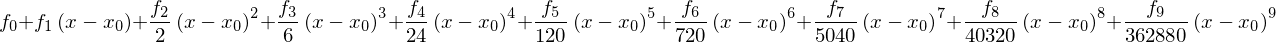

In [30]:
# Aqui montamos a série de Taylor para N termos. Cada termo possui a forma
# f_n * (x - x0)**n/n!.
N = 10
fx = sum(var('f%s' % n) * (x - x0)**n / fat(n) for n in range(N))
fx

Agora calculamos a integral de f no intervalo (x0, x0 + h). Usamos a função sp.integrate do sympy: ela calcula a integral de uma função algebricamente.

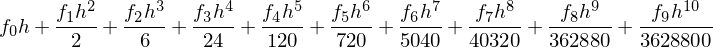

In [32]:
integral = sp.integrate(fx, (x, x0, x0 + h))
integral = integral.expand()
integral

Temos a resposta para a integral. Agora queremos comparar com as regras de quadratura. Começamos com a regra do ponto do meio para verificar se obtemos os mesmos resultados que antes.

Para calcular a quadratura pela regra do ponto do meio, basta avaliar:

$$Q_{mid} = h\ f\left(x_0 + \frac{h}{2}\right)$$

Para tanto, substituímos o argumento da expansão fx no ponto $x\mapsto x_0 + \frac{h}{2}$

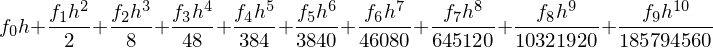

In [36]:
# O método .subs() da expressão fx permite fazer a substituição de variáveis.
# Ele recebe um dicionário mapeando as variáveis da expressão nos valores
# a serem substituídos
quad = h * fx.subs({x: x0 + h/2})

# Simplifica os termos expandindo todos parênteses
quad = quad.expand()
quad

Obtemos uma série semelhante à mostrada anteriormente. Quando subtraímos um valor pelo outro, o termo principal do resultado fornece uma estimativa de erro da série.

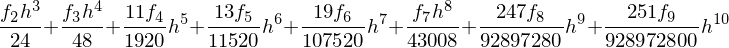

In [37]:
integral - quad

Vemos então que o fator principal do erro corresponde a uma expressão do tipo 

$$e = \frac{f''(\zeta)}{24} h^3$$

Segundo o teorema do valor médio, existe um valor de $\zeta$ dentro do intervalo de $[0, h]$ que faz com que o termo acima seja **exatamente** igual à série completa do erro. Na prática nunca sabemos o valor exato de $\zeta$ que produz esta igualdade, mas ainda assim podemos utilizar a fórmula acima para produzir uma estimativa do valor máximo do erro ou do seu comportamento global quando mudamos o número de sub-divisões no intervalo de integração e consequentemente o valor de $h$.

### Erro para outras regras de quadratura

Vamos repetir a análise para a regra do trapézio e para a regra de Simpson. Depois você pode repetir os passos e e calcular o erro para a regra de Simpson 3/8.

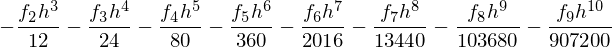

In [38]:
quad = h / 2 * (fx.subs({x: x0}) + fx.subs({x: x0 + h}))
quad = quad.expand()
integral - quad

Desta forma vemos que o erro da regra do trapézio é de

$$e = -\frac{f''(\zeta)}{12} h^3$$.

Note que este erro é o dobro do erro induzido pela regra do ponto médio. De fato, se você verificar os resultados obtidos acima vemos que de fato a regra do ponto médio tende a ser duas vezes mais precisa que a regra do trapézio.

Agora vamos à regra de Simpson

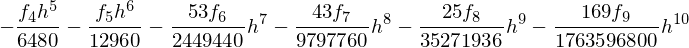

In [40]:
f1 = fx.subs({x: x0})
f2 = fx.subs({x: x0 + h/3})
f3 = fx.subs({x: x0 + 2*h/3})
f4 = fx.subs({x: x0 + h})
quad = h / 8 * (f1 + 3 * f2 + 3 * f3 + f4)
quad = quad.expand()
integral - quad

Daí deduzimos a regra do erro como sendo

$$e = -\frac{f^{(4)}(\zeta)}{2880} h^5$$.

Observe que, diferentemente das regras anteriores, a regra de Simpson possui um fator multiplicativo de $h^5$ e não de $h^3$. Quando pensamos em $h \rightarrow 0$, isto significa que a regra de Simpson produz erros que vão a zero mais rapidamente que a regra do ponto médio.

## Erro em quadraturas Gaussianas

Quadraturas Gaussianas exigem uma atenção especial pois são definidas em um intervalo simétrico de -1 até 1. Modificamos o intervalo para -h/2, h/2 para levar em conta a dependência do erro com o tamanho do intervalo de integração. Expandimos $f(x)$ em torno do zero e calculamos a integral.

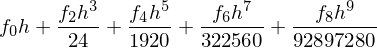

In [41]:
N = 10
fx = sum(var('f%s' % n) * x**n / fat(n) for n in range(N))
integral = fx.integrate((x, -h/2, h/2))
integral

Vamos aplicar a regra de quadratura de dois pontos para ilustrar o procedimento

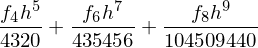

In [42]:
w = 1
u = sp.sqrt(one / 3)
quad = h/2 * (w * fx.subs({x: -h/2 * u}) + w * fx.subs({x: h/2 * u}))
quad = quad.expand()
integral - quad

Daí descobrimos que o erro para a regra de quadratura Gaussiana de dois pontos é igual a

$$e = \frac{f^(4)}{4320} h^5$$

É a mesma ordem de grandeza da regra de Simpson, mas utiliza apenas dois pontos no integrando ao invés de 3. Vemos também que o erro é consideravelmente menor pois o fator de $1/2880$ na regra de Simpson é substituído por $1/4320$.